<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workflow-and-Chart-Layers" data-toc-modified-id="Workflow-and-Chart-Layers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Workflow and Chart Layers</a></span><ul class="toc-item"><li><span><a href="#Get-all-the-observations-(rows)-for-2007" data-toc-modified-id="Get-all-the-observations-(rows)-for-2007-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get all the observations (rows) for 2007</a></span></li><li><span><a href="#Create-the-summary-data" data-toc-modified-id="Create-the-summary-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create the summary data</a></span></li><li><span><a href="#Creating-the-Chart-Layer" data-toc-modified-id="Creating-the-Chart-Layer-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating the Chart Layer</a></span></li><li><span><a href="#Creating-the-Graphical-Layer" data-toc-modified-id="Creating-the-Graphical-Layer-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creating the Graphical Layer</a></span></li><li><span><a href="#Creating-the-Textual-Layer" data-toc-modified-id="Creating-the-Textual-Layer-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Creating the Textual Layer</a></span></li></ul></li><li><span><a href="#Putting-the-three-layers-together" data-toc-modified-id="Putting-the-three-layers-together-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Putting the three layers together</a></span></li><li><span><a href="#Boxplot-of-life-expectancy-process" data-toc-modified-id="Boxplot-of-life-expectancy-process-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Boxplot of life expectancy process</a></span></li><li><span><a href="#Scatterplot-of-life-expectancy" data-toc-modified-id="Scatterplot-of-life-expectancy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scatterplot of life expectancy</a></span></li><li><span><a href="#Using-Seaborn" data-toc-modified-id="Using-Seaborn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using Seaborn</a></span></li></ul></div>

# Workflow and Chart Layers

https://towardsdatascience.com/3-visualization-layers-for-information-rich-charts-with-altair-and-python-7a66c0cbdd39

![chart_layers.png](images/chart_layers.png)

## Get all the observations (rows) for 2007

In [18]:

# import libraries
import pandas as pd
from gapminder import gapminder
import altair as alt

# constants
c_cp = ["#335C67", "#fff3b0", "#e09f3e", "#9e2a2b", "#540b0e"] #https://coolors.co/335c67-fff3b0-e09f3e-9e2a2b-540b0e
c_chart_width = 600 
c_chart_height = 250

# Filter for year 2007
df = (
    gapminder
    .query('year == 2007')
)

df

country continent  year  lifeExp       pop     gdpPercap
11           Afghanistan      Asia  2007   43.828  31889923    974.580338
23               Albania    Europe  2007   76.423   3600523   5937.029526
35               Algeria    Africa  2007   72.301  33333216   6223.367465
47                Angola    Africa  2007   42.731  12420476   4797.231267
59             Argentina  Americas  2007   75.320  40301927  12779.379640
...                  ...       ...   ...      ...       ...           ...
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906
1691              Zambia    Africa  2007   42.384  11746035   1271.211593
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298

[142 rows x 6 columns]

## Create the summary data

In [2]:
df_summary = (
    df
    .describe()
    .reset_index()
    .query("index == 'mean' | index == '25%' | index == '50%' | index == '75%'")
    .assign(lifeExpRounded = lambda x: x.lifeExp.round(1))
)

df_summary['lifeExpRounded'] = df_summary['lifeExpRounded'].astype("str")

df_summary = (
    df_summary
    .assign(label = ["Mean", "Q1", "Median", "Q3"])
    .assign(color = [c_cp[2], c_cp[3], c_cp[4], c_cp[2]])
    .assign(labelValue = lambda x: x.label + " " + x.lifeExpRounded)
    .assign(labelValueLineBreak = lambda x: x.label + "\n" + x.lifeExpRounded)
)
df_summary

index    year    lifeExp           pop     gdpPercap lifeExpRounded   label  \
1  mean  2007.0  67.007423  4.402122e+07  11680.071820           67.0    Mean   
4   25%  2007.0  57.160250  4.508034e+06   1624.842248           57.2      Q1   
5   50%  2007.0  71.935500  1.051753e+07   6124.371108           71.9  Median   
6   75%  2007.0  76.413250  3.121004e+07  18008.835640           76.4      Q3   

     color   labelValue labelValueLineBreak  
1  #e09f3e    Mean 67.0          Mean\n67.0  
4  #9e2a2b      Q1 57.2            Q1\n57.2  
5  #540b0e  Median 71.9        Median\n71.9  
6  #e09f3e      Q3 76.4            Q3\n76.4

## Creating the Chart Layer

In [3]:
# create histogram
layer_chart = (
    alt.Chart(df)
    .mark_bar(color = c_cp[3])
    .encode(
        alt.X(
            "lifeExp:Q",
            title = "Life Expectancy in Years (Distribution)",
            bin = alt.Bin(step = 4)
        ),
        y = "count()",
    )
    .properties(
        title = {
            "text": "Distribution of Life Expectancy (Gapminder Data)",
            "subtitle": ["According to the Gapminder data, the people of listed countries have a life expectancy of", "67 years, on average. However, more than 50% countries have a life expectancy of 71.9 years.", "For 25 percent people are expected to live above 76.4 years."]
        },
        width = c_chart_width,
        height = c_chart_height
    )
)
layer_chart

alt.Chart(...)

## Creating the Graphical Layer

In [4]:
# create structure rules
layer_graphical = (
    alt.Chart(df_summary)
    .mark_rule(
        color = c_cp[4],
        size = 3
    )
    .encode(
        #color = "color:O",
        x = alt.X("lifeExp:Q", scale = alt.Scale(domain = (36, 84)))
    )
    .properties(
        width = c_chart_width,
        height = c_chart_height
    )
)
layer_graphical

alt.Chart(...)

## Creating the Textual Layer

In [5]:

# create text annotations
layer_text = (
    alt.Chart(df_summary)
    .mark_text(
        lineBreak = "\n",
        dy = -40,
        y = 10,
        fontSize = 12, fontWeight = "bold"
    )
    .encode(
        #text = "labelValue:N",
        text = "labelValueLineBreak:N",
        x = alt.X("lifeExp:Q", scale = alt.Scale(domain = (36, 84)))
    )
    .properties(
        width = c_chart_width,
        height = c_chart_height
    )
)
layer_text

alt.Chart(...)

# Putting the three layers together

In [6]:

chart_hist = layer_chart + layer_graphical + layer_text

chart_hist_conf = chart_hist.configure_title(
    fontSize = 24,
    font = "Optima",
    color = c_cp[4],
    subtitleColor = c_cp[4],
    subtitleFontSize = 16,
    anchor = "start",
    align = "left"
)
chart_hist

alt.LayerChart(...)

# Boxplot of life expectancy process

In [7]:
df_summary = (
    df
    .groupby("continent")
    .describe()
    .lifeExp
    .reset_index()
    .assign(lifeExpMeanRounded = lambda x: x["mean"].round(1))
    .assign(lifeExpCountRounded = lambda x: x["count"].round(0).astype(int))
    .assign(LifeExpCountLabel = lambda x: "n = " + x["lifeExpCountRounded"].astype(str))
    .assign(lifeExpMeanLabel = lambda x: "mean " + x["lifeExpMeanRounded"].astype(str))
)
df_summary

continent  count       mean       std     min       25%      50%       75%  \
0    Africa   52.0  54.806038  9.630781  39.613  47.83400  52.9265  59.44425   
1  Americas   25.0  73.608120  4.440948  60.916  71.75200  72.8990  76.38400   
2      Asia   33.0  70.728485  7.963724  43.828  65.48300  72.3960  75.63500   
3    Europe   30.0  77.648600  2.979813  71.777  75.02975  78.6085  79.81225   
4   Oceania    2.0  80.719500  0.729027  80.204  80.46175  80.7195  80.97725   

      max  lifeExpMeanRounded  lifeExpCountRounded LifeExpCountLabel  \
0  76.442                54.8                   52            n = 52   
1  80.653                73.6                   25            n = 25   
2  82.603                70.7                   33            n = 33   
3  81.757                77.6                   30            n = 30   
4  81.235                80.7                    2             n = 2   

  lifeExpMeanLabel  
0        mean 54.8  
1        mean 73.6  
2        mean 70.7  
3        mean 77.6  
4        mean 80.7

In [8]:

layer_chart = (
    alt.Chart(df)
    .mark_boxplot(color = c_cp[3], size = 30, extent = 0.5)
    .encode(
        y = alt.Y(
            "continent",
            title = "Continent",
            #sort = alt.EncodingSortField(field = "lifeExp", op = "mean")
            sort = ['Africa', 'Asia', 'Americas', 'Europe', 'Oceania']
        ),
        x = alt.X(
            "lifeExp:Q",
            scale = alt.Scale(domain = (37, 84)),
            title = "Life Expectancy in Years (Distribution)"
        )
    )
    .properties(
        title = {
            "text": "Distribution of Life Expectancy by Continent (Gapminder Data)",
            "subtitle": ["When we look at life expectancy by continent individually, it shows a more diverse picture.", " Especially for Africa with 52 listed countries, the average life expectancy is 54.8 years,", " 22.8 years below the overall average.", "", "The data for African countries also shows a wide distribution, ranging from 40 years to 76 years."]
        },
        width = c_chart_width,
        height = c_chart_height * 1.5
    )
)
layer_chart

alt.Chart(...)

In [9]:
layer_graphical = (
    alt.Chart(df_summary)
    .mark_tick(
        color = c_cp[0],
        thickness = 2,
        size = 50
    )
    .encode(
        #color = "color:O",
        x = alt.X("mean:Q"),
        y = alt.Y("continent:N", sort = ['Africa', 'Asia', 'Americas', 'Europe', 'Oceania'])
    )
    .properties(
        width = c_chart_width,
        height = c_chart_height * 1.5
    )
)
layer_graphical

alt.Chart(...)

In [10]:

layer_text = (
    alt.Chart(df_summary)
    .mark_text(
        x = 25
    )
    .encode(
        y = alt.Y("continent:N", sort = ['Africa', 'Asia', 'Americas', 'Europe', 'Oceania']),
        text = "LifeExpCountLabel:N"
    )
    .properties(
        width = c_chart_width,
        height = c_chart_height * 1.5
    )
)

layer_text = layer_text + (
    alt.Chart(df_summary)
    .mark_text(
        dy = -22,
        dx = 32
    )
    .encode(
        y = alt.Y("continent:N", sort = ['Africa', 'Asia', 'Americas', 'Europe', 'Oceania']),
        x = alt.X("mean:Q"),
        text = "lifeExpMeanLabel:N"
    )
)
layer_text

alt.LayerChart(...)

In [11]:

chart_bp = layer_chart + layer_graphical + layer_text

chart_bp_conf = chart_bp.configure_title(
    fontSize = 24,
    font = "Optima",
    color = c_cp[4],
    subtitleColor = c_cp[4],
    subtitleFontSize = 16,
    anchor = "start"
)

chart_bp_conf = chart_bp_conf.configure_axisX(labelAngle = 0)
chart_bp_conf

alt.LayerChart(...)

# Scatterplot of life expectancy

In [12]:
df_africa = (
    df
    .query("continent == 'Africa'")
)

Q1 = df_africa.lifeExp.quantile(.25)
Q2 = df_africa.lifeExp.quantile(.5)
Q3 = df_africa.lifeExp.quantile(.75)

df_africa["Quartile Range"] = (
    df_africa.lifeExp.apply(lambda x: "<= Q1 quartile" if x <= Q1 else ">= Q3 quartile" if x >= Q3 else "inter-quartile range")
)

sort = (
    df_africa
    .sort_values("lifeExp")
    .country.ravel()
)

/var/folders/0q/ntwcxlqn1111n9nhc76xwp1w0000gn/T/ipykernel_2424/234376858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa["Quartile Range"] = (


In [13]:
df_summary = (
    df_africa
    .describe()
    .reset_index()
    .query("index == '25%' | index == '50%' | index == '75%'")
    .assign(lifeExpRounded = lambda x: x.lifeExp.round(1))
)

df_summary['lifeExpRounded'] = df_summary['lifeExpRounded'].astype("str")

df_summary = (
    df_summary
    .assign(label = ["Q1", "Median", "Q3"])
    .assign(color = [c_cp[3], c_cp[4], c_cp[2]])
    .assign(labelValue = lambda x: x.label + " " + x.lifeExpRounded)
    .assign(labelValueLineBreak = lambda x: x.label + "\n" + x.lifeExpRounded)
)
df_summary

index    year   lifeExp         pop    gdpPercap lifeExpRounded   label  \
4   25%  2007.0  47.83400   2909226.5   862.951537           47.8      Q1   
5   50%  2007.0  52.92650  10093310.5  1452.267078           52.9  Median   
6   75%  2007.0  59.44425  19363654.5  3993.501583           59.4      Q3   

     color   labelValue labelValueLineBreak  
4  #9e2a2b      Q1 47.8            Q1\n47.8  
5  #540b0e  Median 52.9        Median\n52.9  
6  #e09f3e      Q3 59.4            Q3\n59.4

In [14]:
layer_chart = (
    alt.Chart(df_africa)
    .mark_point()
    .encode(
        x = alt.X(
            "lifeExp:Q",
            scale = alt.Scale(domain = (37, 84)),
            title = "Life Expectancy in Years (Distribution)"
        ),
        y = alt.Y(
            "country",
            title = "Country",
            sort = sort
        ),
        color = alt.Color("Quartile Range", legend = alt.Legend(orient = "top-right"))
    )
    .properties(
        title = {
            "text": "Distribution of Life Expectancy by African Countries (Gapminder Data)",
            "subtitle": ["There are 13 countries with a life expectancy of below 47.8 years, with Swaziland with an average of 39.6 years.", "Followed by 26 countries that lie between 47.8 and 59.4 years. Somalia with 48.1 years on the far left of the ", "inter-quartile range (IQR) and Madagascar on the far right of the IQR with 59.4 years. ", "Then we see some outliers with higher life expectancy compared to all countries. ", "Morocco with 71.2 years and Reunion with the maximum average life expectancy of 76.4 years."]
        },
        width = c_chart_width,
        height = c_chart_height * 2.5
    )
)
layer_chart

alt.Chart(...)

In [15]:

layer_graphical = (
    alt.Chart(df_summary)
    .mark_rule(
        color = c_cp[4],
        opacity= 0.35,
        size = 3
    )
    .encode(
        x = alt.X("lifeExp:Q", scale = alt.Scale(domain = (36, 84)))
    )
    .properties(
        width = c_chart_width,
        height = c_chart_height * 2.5
    )
)
layer_graphical

alt.Chart(...)

In [16]:
layer_text = (
    alt.Chart(df_summary)
    .mark_text(
        lineBreak = "\n",
        dy = -40,
        y = 10,
        fontSize = 12, fontWeight = "bold"
    )
    .encode(
        text = "labelValueLineBreak:N",
        x = alt.X("lifeExp:Q", scale = alt.Scale(domain = (36, 84)))
    )
    .properties(
        width = c_chart_width,
        height = c_chart_height * 2.5
    )
)
layer_text

alt.Chart(...)

In [17]:
chart_p = layer_graphical + layer_chart + layer_text

chart_p = chart_p.configure_title(
    fontSize = 24,
    font = "Optima",
    color = c_cp[4],
    subtitleColor = c_cp[4],
    subtitleFontSize = 16,
    #align = "left"
    anchor = "start"
)
chart_p

alt.LayerChart(...)

# Using Seaborn

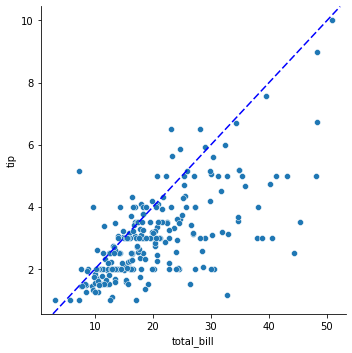

In [24]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

tips = sns.load_dataset("tips")
penguins = sns.load_dataset('penguins')

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        
#tips = pd.read_csv('/kaggle/input/seaborn-practice/tips.csv')
#penguins = pd.read_csv('/kaggle/input/seaborn-practice/penguins.csv')


# Example taken from Seaborn documentation
# Use tips dataset

g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

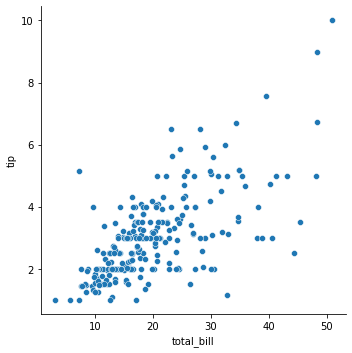

In [20]:
layer_chart = sns.relplot(data=tips, x="total_bill", y="tip")

In [22]:
layer_graphical = g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))
layer_graphical

In [23]:
x = layer_chart+layer_graphical
x

TypeError: unsupported operand type(s) for +: 'FacetGrid' and '_AxLine'

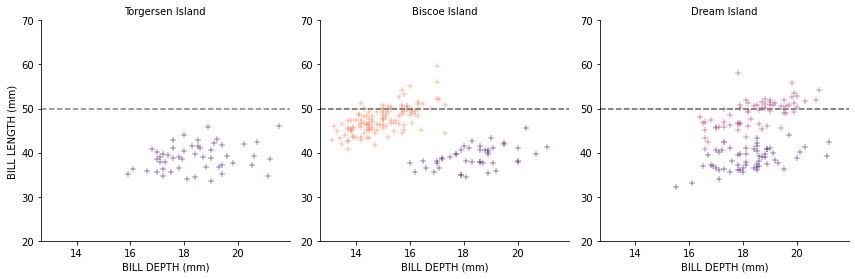

In [32]:
p = sns.FacetGrid(penguins, 
                  col='island', 
                  height = 4, 
                  aspect =1, 
                  sharey=False, 
                  ylim=(20, 70), 
                  hue = 'species',
                  palette = 'magma')

p.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm', marker = '+');

p.refline(y=50)


p.set_axis_labels('BILL DEPTH (mm)', 'BILL LENGTH (mm)'); 
p.set_titles(col_template='{col_name} Island');